In [1]:
import os
import sys
import config as cfg
import time


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()


In [2]:
PROJECT_NAME = 'RandomForestKb'
PROJECT_START_DATE = '19/07/2019' #ENGLISH DATE FORMAT
PROJECT_END_DATE = '' #ENGLISH DATE FORMAT

In [3]:
#ROOT, PROJECT_ROOT, PACKAGE_ROOT = config.configure_environment('Local',PROJECT_NAME)

config = cfg.privateConfig(cfg.OS, PROJECT_NAME)

The haribo package provides the following functions to use in Jupyter:

set_screen_width() - sets cells to be 90% of screen width

show_df(dataFrame, allRows = False) - shows all columns of a dataFrame when displayed

pickle_it(data, path) - safely pickles a file

from_pickle_jar(path) - safely loads a pickled file



In [4]:
from CodeCandy.haribo import jupyter as candy

# Brief

For this project I want to be able to predict how many people will attend my class on a given day using the data I have collected from my classes over the past several years.  I also want to combine my dataset with additional information for Manchester, UK (where my classes took place) such as weather data.

I would like to understand what the influencing factors on class attendance are.

# Import the CSV data

## Read into DataFrame

In [5]:
dfRaw = pd.read_csv(os.path.join(config.PROJECT_ROOT, 'Materials','CSV','raw.csv'),parse_dates=True)

dfRaw = pd.read_csv(
    os.path.join(config.PROJECT_ROOT, 'Materials','CSV','raw.csv'),
    parse_dates=['Date'],
    dayfirst=True,
    index_col='Date', 
    dtype={
        'AcademicYear':np.int32,
        'Week': np.int32,
        'HeadCount': np.int32,
        'PaidCount': np.int32,
    }
)
dfRaw['ClassTime']= dfRaw['ClassTime'].apply(lambda x: x[:-2])
dfRaw['ClassTime']= pd.to_datetime(dfRaw.index.astype(str) + ' ' + dfRaw['ClassTime'].astype(float).add(12.00).round(2).astype(str).str.replace('.',':') +'0').dt.time

dfRaw['year'] = [d.year for d in dfRaw.index]
dfRaw['month'] = [d.strftime('%b') for d in dfRaw.index]




In [6]:
dfRaw.describe()

,AcademicYear,Week,HeadCount,PaidCount,CashTaken,year
count,452.000000,452.000000,452.000000,452.000000,450.00000,452.000000
mean,2014.588496,14.654867,39.984513,31.108407,121.85600,2015.183628
std,2.307541,8.212013,32.585718,20.678389,80.42385,2.371186
min,2011.000000,1.000000,0.000000,0.000000,0.00000,2011.000000
25%,2013.000000,8.000000,21.000000,18.000000,70.20000,2013.000000
50%,2015.000000,15.000000,32.000000,29.000000,113.10000,2015.000000
75%,2017.000000,22.000000,48.000000,39.000000,152.10000,2017.000000
max,2018.000000,31.000000,240.000000,154.000000,600.60000,2019.000000


In [7]:
dfRaw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 452 entries, 2011-09-27 to 2019-05-30
Data columns (total 11 columns):
AcademicYear    452 non-null int32
Week            452 non-null int32
HeadCount       452 non-null int32
PaidCount       452 non-null int32
CashTaken       450 non-null float64
ClassTime       452 non-null object
Venue           452 non-null object
Event           76 non-null object
Social          9 non-null object
year            452 non-null int64
month           452 non-null object
dtypes: float64(1), int32(4), int64(1), object(5)
memory usage: 35.3+ KB


## Wrangle and twist the data into a sensible format

In [8]:
candy.show_df(dfRaw.head(10))

,AcademicYear,Week,HeadCount,PaidCount,CashTaken,ClassTime,Venue,Event,Social,year,month
Date,,,,,,,,,,,
2011-09-27,2011,1,26,0,0.0,18:00:00,Sugden,First Class,NaN,2011,Sep
2011-09-29,2011,1,42,0,0.0,18:30:00,Sugden,NaN,NaN,2011,Sep
2011-10-04,2011,2,33,33,128.7,18:00:00,Sugden,NaN,NaN,2011,Oct
2011-10-06,2011,2,33,33,128.7,18:30:00,Sugden,NaN,NaN,2011,Oct
2011-10-11,2011,3,27,27,105.3,18:00:00,Sugden,NaN,NaN,2011,Oct
2011-10-13,2011,3,42,42,163.8,18:30:00,Sugden,NaN,NaN,2011,Oct
2011-10-18,2011,4,21,21,81.9,18:00:00,Sugden,NaN,NaN,2011,Oct
2011-10-20,2011,4,32,32,124.8,18:30:00,Sugden,NaN,NaN,2011,Oct
2011-10-25,2011,5,23,23,89.7,18:00:00,Sugden,NaN,NaN,2011,Oct


(10, 11)


# EDA

Text(0,0.5,'Number of Students')

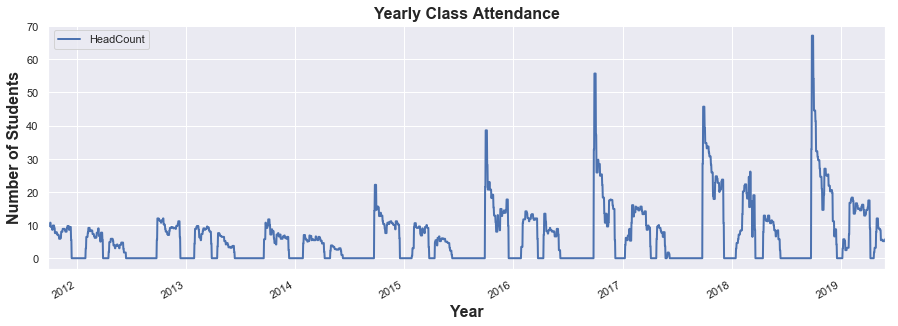

In [9]:
idx = pd.date_range(dfRaw.index.min(), dfRaw.index.max())
dfRaw.reindex(idx,fill_value=0)[['HeadCount']].rolling(window=7).mean().plot(figsize=(15,5),linewidth=2,subplots=True)
plt.title('Yearly Class Attendance',fontsize=16,fontweight='bold')
plt.xlabel('Year',fontsize=16,fontweight='bold')
plt.ylabel('Number of Students',fontsize=16,fontweight='bold')

## Overview

In [10]:
dfRaw.columns

Index(['AcademicYear', 'Week', 'HeadCount', 'PaidCount', 'CashTaken',
       'ClassTime', 'Venue', 'Event', 'Social', 'year', 'month'],
      dtype='object')

In [11]:
dfRaw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 452 entries, 2011-09-27 to 2019-05-30
Data columns (total 11 columns):
AcademicYear    452 non-null int32
Week            452 non-null int32
HeadCount       452 non-null int32
PaidCount       452 non-null int32
CashTaken       450 non-null float64
ClassTime       452 non-null object
Venue           452 non-null object
Event           76 non-null object
Social          9 non-null object
year            452 non-null int64
month           452 non-null object
dtypes: float64(1), int32(4), int64(1), object(5)
memory usage: 55.3+ KB


In [12]:
dfRaw.describe()

,AcademicYear,Week,HeadCount,PaidCount,CashTaken,year
count,452.000000,452.000000,452.000000,452.000000,450.00000,452.000000
mean,2014.588496,14.654867,39.984513,31.108407,121.85600,2015.183628
std,2.307541,8.212013,32.585718,20.678389,80.42385,2.371186
min,2011.000000,1.000000,0.000000,0.000000,0.00000,2011.000000
25%,2013.000000,8.000000,21.000000,18.000000,70.20000,2013.000000
50%,2015.000000,15.000000,32.000000,29.000000,113.10000,2015.000000
75%,2017.000000,22.000000,48.000000,39.000000,152.10000,2017.000000
max,2018.000000,31.000000,240.000000,154.000000,600.60000,2019.000000


### Class time vs venues

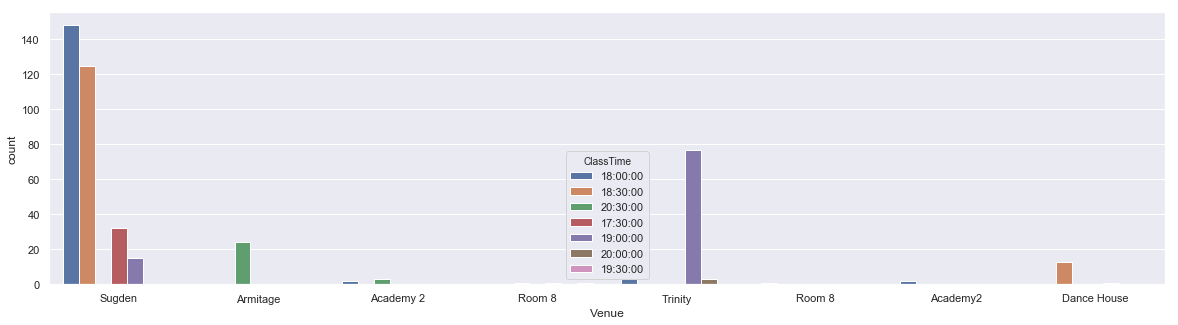

In [13]:
#dfRaw[['ClassTime']].plot(kind='bar')
plt.figure(figsize=(20,5))
sns.countplot(data=dfRaw,x='Venue', hue='ClassTime')

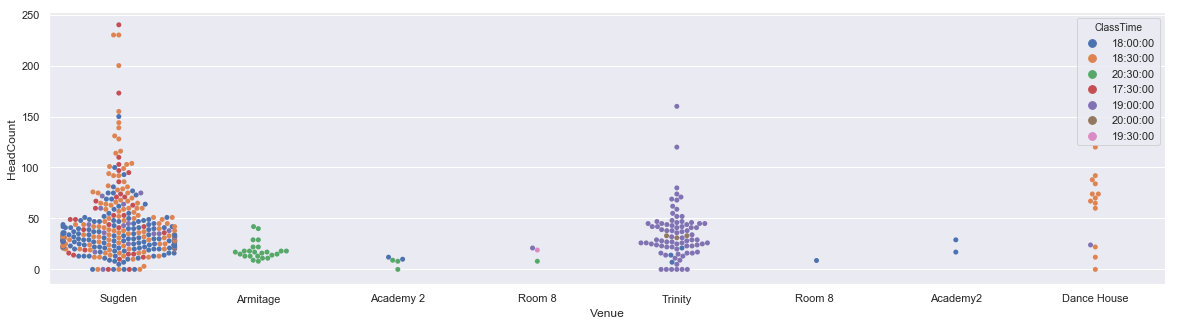

In [14]:
plt.figure(figsize=(20,5))
sns.swarmplot(data=dfRaw, x='Venue',y='HeadCount', hue='ClassTime')


In [15]:
dfRaw['Event'].value_counts()

Grading            28
First Class        21
No Class            8
time change         7
Reading week        4
Time Change         4
Reading Week        2
parents evening     1
no class            1
Name: Event, dtype: int64

In [16]:
dfRaw.groupby(['ClassTime','Venue','AcademicYear']).mean().sort_values(by='HeadCount',ascending=False)

Week   HeadCount  PaidCount  \
ClassTime Venue       AcademicYear                                     
18:30:00  Sugden      2017           6.000000  106.272727  72.909091   
          Dance House 2017           7.000000   63.692308  43.076923   
          Sugden      2018          16.000000   61.451613  44.161290   
                      2016          15.000000   59.758621  43.517241   
17:30:00  Sugden      2018          16.000000   59.064516  35.612903   
18:00:00  Sugden      2015          13.000000   51.040000  37.320000   
                      2017          20.500000   45.166667  35.222222   
19:00:00  Sugden      2017          22.000000   41.333333  27.266667   
          Trinity     2015          13.200000   41.000000  28.200000   
18:00:00  Sugden      2014          13.538462   37.846154  34.000000   
19:00:00  Trinity     2016          15.000000   36.344828  26.068966   
20:00:00  Trinity     2014           8.000000   33.000000  33.000000   
                      2015          24.000000   32.000000  10.000000   
18:30:00  Sugden      2012          14.000000   29.407407  29.407407   
19:00:00  Trinity     2014          12.826087   28.217391  25.826087   
18:30:00  Sugden      2011          14.000000   27.185185  25.629630   
18:00:00  Sugden      2012          14.000000   26.629630  26.629630   
                      2013          13.160000   24.320000  24.320000   
19:00:00  Dance House 2017          14.000000   24.000000  39.000000   
18:00:00  Academy2    2015          26.500000   23.000000  23.000000   
19:00:00  Room 8      2014          26.000000   21.000000  21.000000   
18:00:00  Sugden      2011          14.000000   20.962963  20.000000   
19:30:00  Room 8      2014          27.000000   19.000000  19.000000   
20:30:00  Armitage    2013          12.500000   18.541667  16.875000   
17:30:00  Sugden      2013          24.000000   15.000000  15.000000   
18:00:00  Trinity     2014          25.333333   14.000000  14.000000   
          Academy 2   2013          26.500000   11.000000  11.000000   
          Room 8      2014          28.000000    9.000000   9.000000   
20:30:00  Room 8      2013          26.000000    8.000000   8.000000   
          Academy 2   2013          26.666667    5.666667   5.666667   

                                     CashTaken         year  
ClassTime Venue       AcademicYear                           
18:30:00  Sugden      2017          284.345455  2017.000000  
          Dance House 2017          168.000000  2017.153846  
          Sugden      2018          172.229032  2018.612903  
                      2016          169.717241  2016.620690  
17:30:00  Sugden      2018          138.890323  2018.612903  
18:00:00  Sugden      2015          151.566667  2015.520000  
                      2017          137.366667  2018.000000  
19:00:00  Sugden      2017          106.340000  2018.000000  
          Trinity     2015          114.495833  2015.560000  
18:00:00  Sugden      2014          132.600000  2014.538462  
19:00:00  Trinity     2016          101.668966  2016.620690  
20:00:00  Trinity     2014          128.700000  2014.000000  
                      2015           39.000000  2016.000000  
18:30:00  Sugden      2012          114.688889  2012.592593  
19:00:00  Trinity     2014          100.721739  2014.521739  
18:30:00  Sugden      2011           99.955556  2011.592593  
18:00:00  Sugden      2012          103.855556  2012.592593  
                      2013           94.848000  2013.520000  
19:00:00  Dance House 2017          152.100000  2018.000000  
18:00:00  Academy2    2015           89.700000  2016.000000  
19:00:00  Room 8      2014           81.900000  2015.000000  
18:00:00  Sugden      2011           78.000000  2011.592593  
19:30:00  Room 8      2014           74.100000  2015.000000  
20:30:00  Armitage    2013           65.812500  2013.500000  
17:30:00  Sugden      2013           58.500000  2014.000000  
18:00:00  Trinity     2014           54.600000  2015.000000  


## Modelling 1.0

In [17]:
from fastai.old.fastai.imports import *
from fastai.old.fastai.structured import *
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

from sklearn import metrics

In [18]:
dfRaw.columns

Index(['AcademicYear', 'Week', 'HeadCount', 'PaidCount', 'CashTaken',
       'ClassTime', 'Venue', 'Event', 'Social', 'year', 'month'],
      dtype='object')

### Using features as they are

I will use the features as they are with no feature engineering or modification.  In this model there is only the date as the index and I havent extracted the week of year, month or any other time based data.  I also am missing data for reading week for the past few years.  I have included all data from 2010/11 through to 2019.  Some of this data, or lack of may well be affecting the model fit and ability to generalise.

In [19]:
dfForest = dfRaw[['AcademicYear', 'Week', 'HeadCount','ClassTime', 'Venue', 'Event', 'Social']]
dfForest.rename(columns={'Week':'AcademicWeek'},inplace=True)
dfForest.fillna('None',axis=1,inplace=True)
#dfForest['ClassTime'] = dfForest['ClassTime'].astype(str)
dfForest.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 452 entries, 2011-09-27 to 2019-05-30
Data columns (total 7 columns):
AcademicYear    452 non-null int32
AcademicWeek    452 non-null int32
HeadCount       452 non-null int32
ClassTime       452 non-null object
Venue           452 non-null object
Event           452 non-null object
Social          452 non-null object
dtypes: int32(3), object(4)
memory usage: 23.0+ KB


/anaconda3/envs/old_fastai-cpu_env/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/anaconda3/envs/old_fastai-cpu_env/lib/python3.6/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [20]:
train_cats(dfForest)

/Users/chrispickford/Documents/Coding/Python/Projects/fastai/old/fastai/structured.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()


In [21]:
dfForest.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 452 entries, 2011-09-27 to 2019-05-30
Data columns (total 7 columns):
AcademicYear    452 non-null int32
AcademicWeek    452 non-null int32
HeadCount       452 non-null int32
ClassTime       452 non-null category
Venue           452 non-null category
Event           452 non-null category
Social          452 non-null category
dtypes: category(4), int32(3)
memory usage: 11.9 KB


In [22]:
df, y, nas = proc_df(dfForest, 'HeadCount')

### Simplest model

In [23]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

/anaconda3/envs/old_fastai-cpu_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9732870670497696

### Split to training and testing sets

In [24]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 50
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((402, 6), (402,), (50, 6))

In [25]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [26]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/anaconda3/envs/old_fastai-cpu_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 19.3 ms, sys: 7.48 ms, total: 26.8 ms
Wall time: 110 ms
[5.20840786016331, 16.183201166641908, 0.9756191270787685, 0.5666387131405621]


In [27]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([99., 99., 99., 86., 99., 99., 99., 99., 86., 99.]), 96.4, 92)

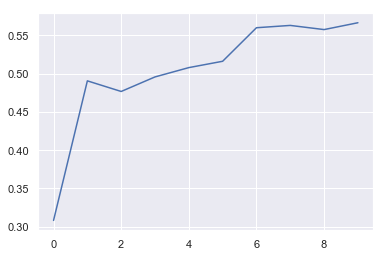

In [28]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

### Use more trees

In [29]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[4.640560669478897, 16.067706354673028, 0.9806455787457208, 0.5728021884831032]


Massively overfitting or effect of time series data, or both

In [30]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([78., 60., 99., 99., 86., 94., 86., 94., 75., 60., 60., 75., 60., 99., 42., 99., 67., 99., 99., 99.,
        94., 99., 42., 67., 86., 60., 99., 60., 99., 60., 99., 86., 42., 99., 99., 60., 99., 74., 99., 65.,
        99., 99., 42., 86., 94., 99., 99., 94., 60., 99., 65., 60., 99., 60., 94., 99., 99., 99., 99., 60.,
        42., 99., 99., 94., 60., 60., 75., 42., 65., 99., 99., 99., 99., 94., 99., 74., 94., 67., 99., 60.]),
 81.775,
 92)

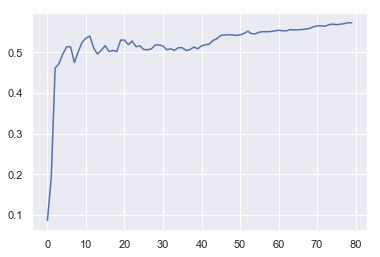

In [31]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(80)]);

### Use OOB samples, restrict depth and restrict features

In [32]:
m = RandomForestRegressor(n_estimators=80, min_samples_leaf=1, max_features=.9, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[4.753973773126241, 16.797648272898204, 0.9796879927678214, 0.5331060854517451, 0.8494976106557366]


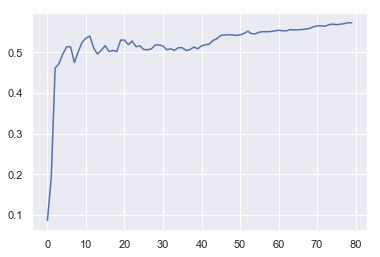

In [33]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(80)]);